![1.png](1.png)

![2.png](2.png)

In [5]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()
options(repr.plot.width=5, repr.plot.height=5)

In [1]:
ptruncnormal<-function(x){
    res<-0
    res<-exp((-1)*x*x/2)*sqrt(2/pi)
    res[x<0]<-0
    res    
}

In [2]:
pmajorizing<-function(x){
    sapply(x,function(y){
	res<-NA
	if (y<0){res<-0}
	if ((y>=0)&&(y<=1)){
	    res<-sqrt(2/pi) ## uniform
	}
	if (y>1){
	    res<-2*exp(-2*(y-1))/(sqrt(2*pi)) ## exponential with rate 2 shifted by 1
	}	
	res
    },simplify=TRUE)
}


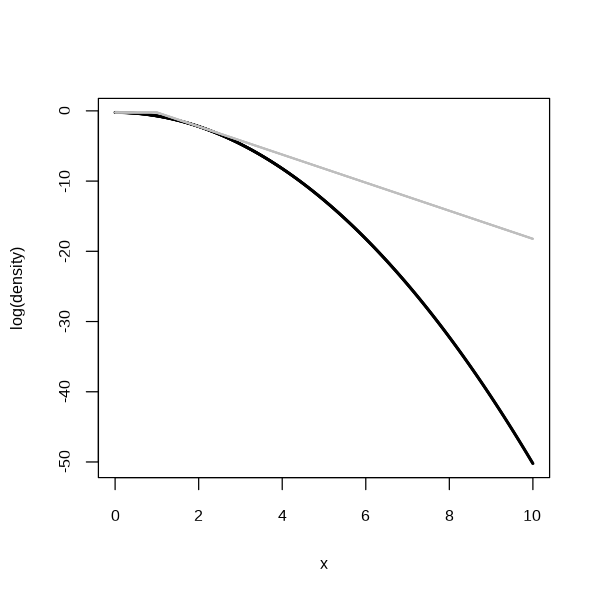

In [6]:
vx<-seq(0,10,by=0.01)
plot(vx,log(ptruncnormal(vx)),pch=19,cex=0.2,xlab="x",ylab="log(density)",main="")
points(vx,log(pmajorizing(vx)),pch=19,cex=0.1,col="gray")

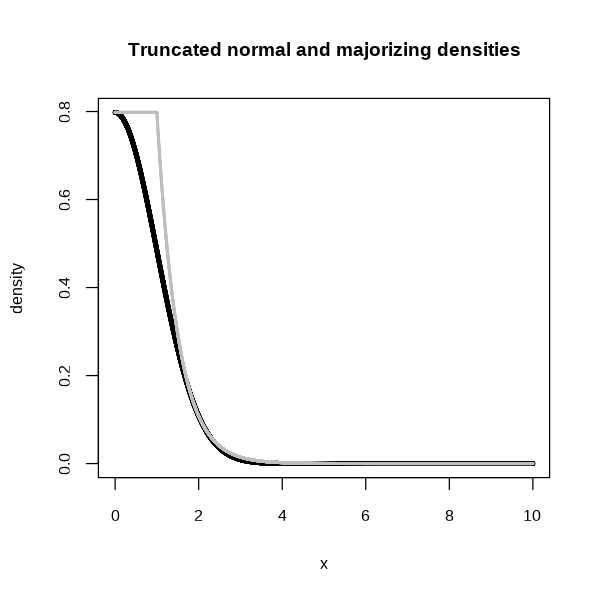

In [7]:
vx<-seq(0,10,by=0.001)
plot(vx,(ptruncnormal(vx)),pch=19,cex=0.4,xlab="x",ylab="density",main="Truncated normal and majorizing densities")
points(vx,(pmajorizing(vx)),pch=19,cex=0.2,col="gray")

In [8]:
rmajorizing<-function(n){
    sapply(1:n,function(i){
	res<-NA
	component<-sample(1:2,1,prob=c(2/3,1/3))
	if(component==1){res<-runif(1)}
	if(component==2){res<-rexp(1,rate=2)+1}
	res
    })
}


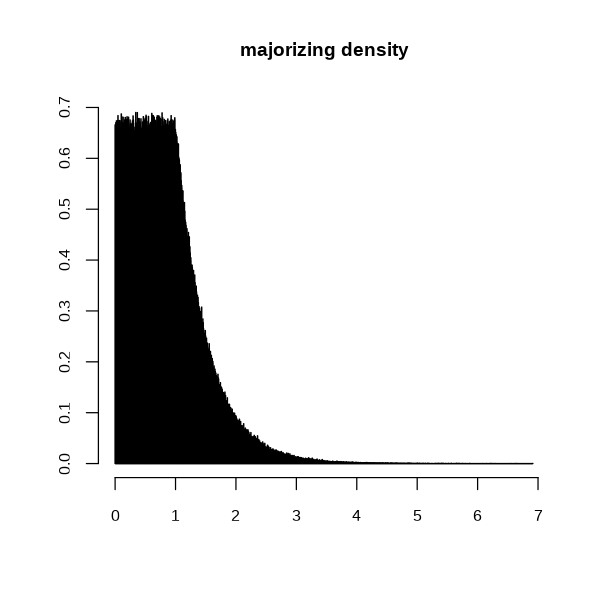

In [9]:
Nsample<-1000000
num_histbreaks<-1000
hist(rmajorizing(Nsample),breaks=1000,col="black",xlab="",ylab="",main="majorizing density",freq=FALSE)


In [10]:
fgentruncnormal<-function(c){
    x<-NA
    num_reject<-0
    while (is.na(x)){
	y<-rmajorizing(1)
	u<-runif(1)
	if (u<=ptruncnormal(y)/(c*pmajorizing(y))){x<-y}
	else{num_reject<-num_reject+1}
    }
    c(x,num_reject)
}


In [11]:

c<- 1
vtruncnormal_acceptreject<-sapply(rep(c,Nsample),fgentruncnormal)[1,]
vtruncnormal_direct<-rnorm(2*Nsample) ; vtruncnormal_direct<-vtruncnormal_direct[vtruncnormal_direct>=0]

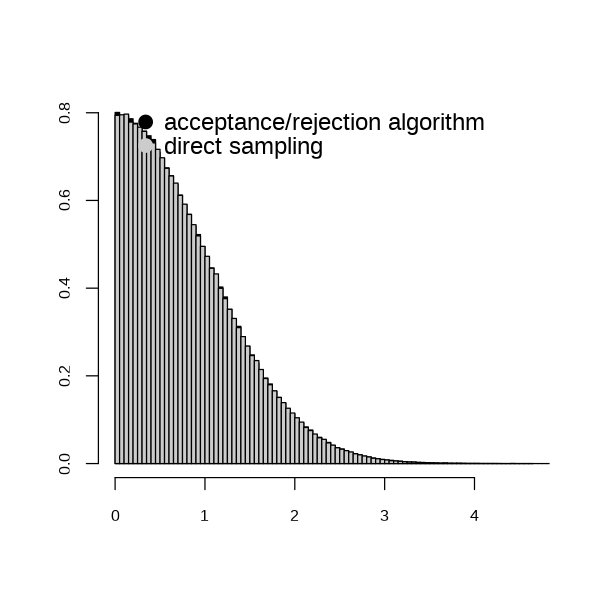

In [12]:
hist(vtruncnormal_acceptreject,col="black",breaks=100,xlab="",ylab="",freq=FALSE,main="")
hist(vtruncnormal_direct,col=gray(0.8),breaks=100,xlab="",ylab="",freq=FALSE,main="",add=TRUE)
legend("topright",pch=19,cex=1.5,legend=c("acceptance/rejection algorithm","direct sampling"),
       col=c("black",gray(0.8)),bty="n")
